<a href="https://colab.research.google.com/github/984IKRAM/DS-/blob/main/ANALYSE_STUDENT_PPERFORMANCE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Le Student Academic Performance Dataset rassemble des informations variées sur les élèves et leurs conditions d’apprentissage afin d’expliquer les facteurs qui influencent leur niveau de performance académique. Le dataset contient un ensemble de variables socio-démographiques, comportementales et scolaires, telles que l’âge, le genre, le niveau d’étude, le temps d’étude quotidien, la présence en cours, les activités extrascolaires, les notes dans différentes matières, ainsi que des caractéristiques liées à la santé et au mode de vie (sommeil, alimentation, stress, etc.). Ces variables permettent d’examiner comment ces différents éléments contribuent à la réussite ou au faible rendement scolaire des étudiants.

La variable cible du dataset est la performance académique, généralement catégorisée en niveaux tels que Low, Medium et High. L’objectif principal de cette analyse est de comprendre les relations entre les habitudes d’étude, les facteurs personnels et les comportements des étudiants pour prédire leur niveau de performance. En utilisant des méthodes statistiques et des modèles de machine learning, on cherche à déterminer quels facteurs influencent le plus la réussite scolaire et à évaluer la capacité des modèles à prédire avec précision la catégorie de performance académique d’un étudiant.


In [5]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#For ignoring warning
import warnings
warnings.filterwarnings("ignore")

In [6]:
import pandas as pd

df = pd.read_csv('/content/StudentsPerformance.csv')

df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [7]:
df.shape

(1000, 8)

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df=df.drop_duplicates()

In [10]:
df.isnull().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [12]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [13]:
from sklearn import preprocessing

# Charger dataset
df = pd.read_csv('/content/StudentsPerformance.csv')

# Initialisation du label encoder
le = preprocessing.LabelEncoder()

# Encodage des variables catégorielles
df['gender'] = le.fit_transform(df['gender'])
df['race/ethnicity'] = le.fit_transform(df['race/ethnicity'])
df['parental level of education'] = le.fit_transform(df['parental level of education'])
df['lunch'] = le.fit_transform(df['lunch'])
df['test preparation course'] = le.fit_transform(df['test preparation course'])

# Vérification
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,1,1,1,1,72,72,74
1,0,2,4,1,0,69,90,88
2,0,1,3,1,1,90,95,93
3,1,0,0,0,1,47,57,44
4,1,2,4,1,1,76,78,75


In [14]:
df


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,1,1,1,1,72,72,74
1,0,2,4,1,0,69,90,88
2,0,1,3,1,1,90,95,93
3,1,0,0,0,1,47,57,44
4,1,2,4,1,1,76,78,75
...,...,...,...,...,...,...,...,...
995,0,4,3,1,0,88,99,95
996,1,2,2,0,1,62,55,55
997,0,2,2,0,0,59,71,65
998,0,3,4,1,0,68,78,77


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   gender                       1000 non-null   int64
 1   race/ethnicity               1000 non-null   int64
 2   parental level of education  1000 non-null   int64
 3   lunch                        1000 non-null   int64
 4   test preparation course      1000 non-null   int64
 5   math score                   1000 non-null   int64
 6   reading score                1000 non-null   int64
 7   writing score                1000 non-null   int64
dtypes: int64(8)
memory usage: 62.6 KB


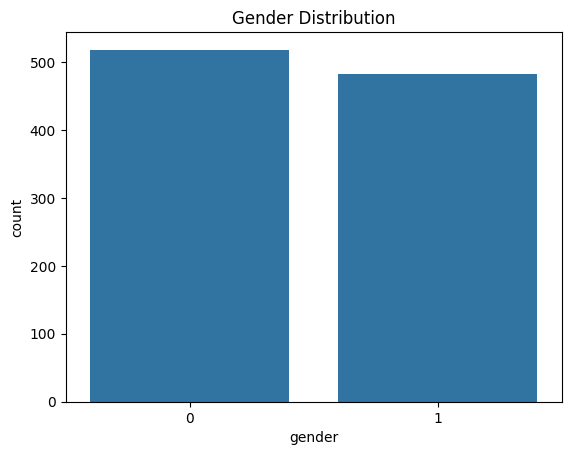

In [17]:
sns.countplot(x='gender', data=df,)
plt.title('Gender Distribution');

In [22]:
df['gender'].value_counts()

,count
gender,
0,518
1,482


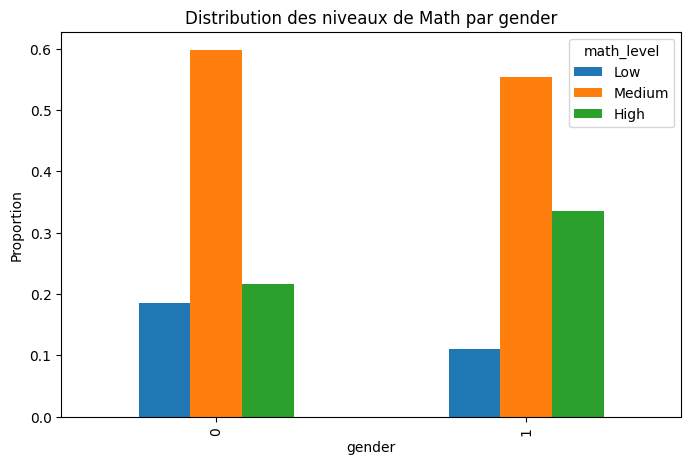

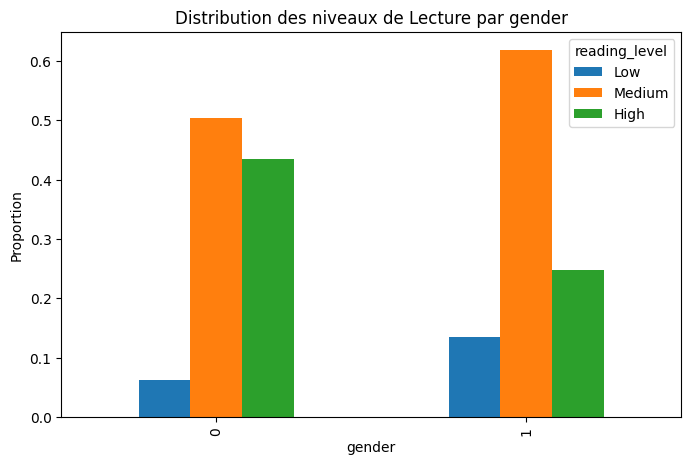

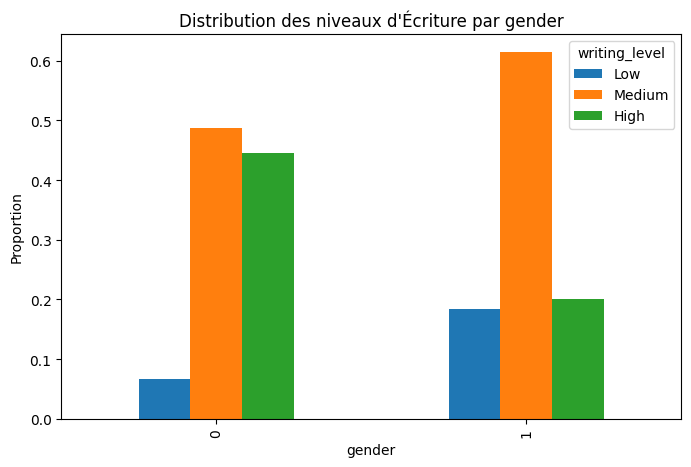

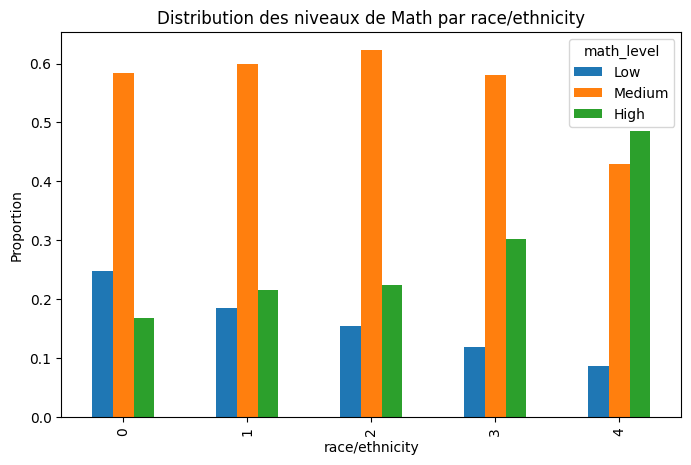

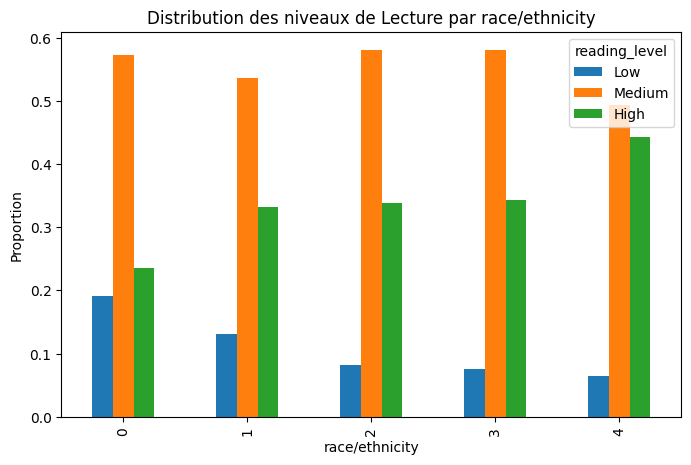

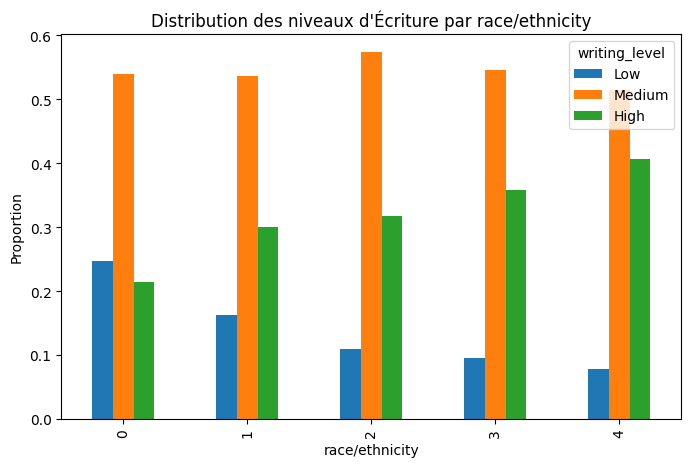

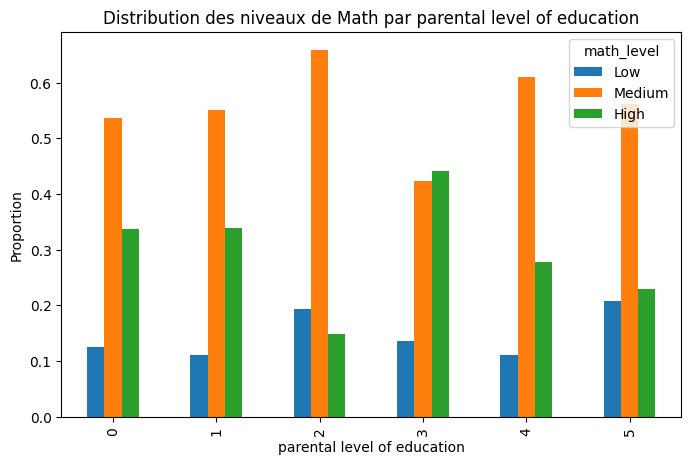

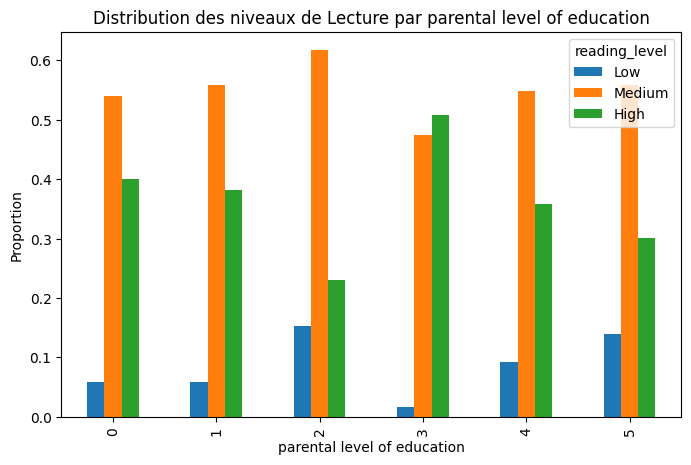

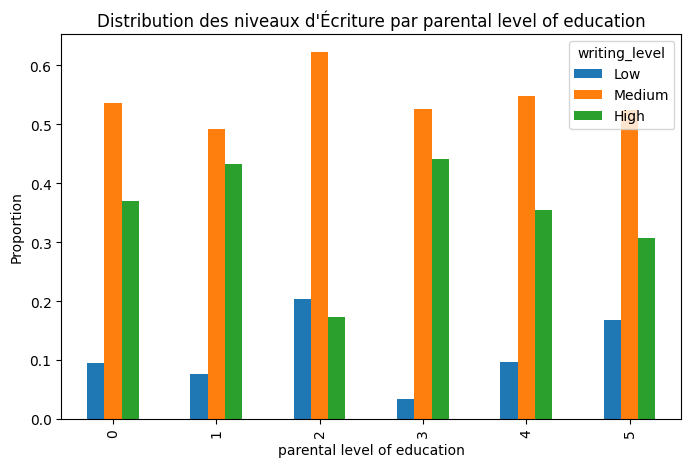

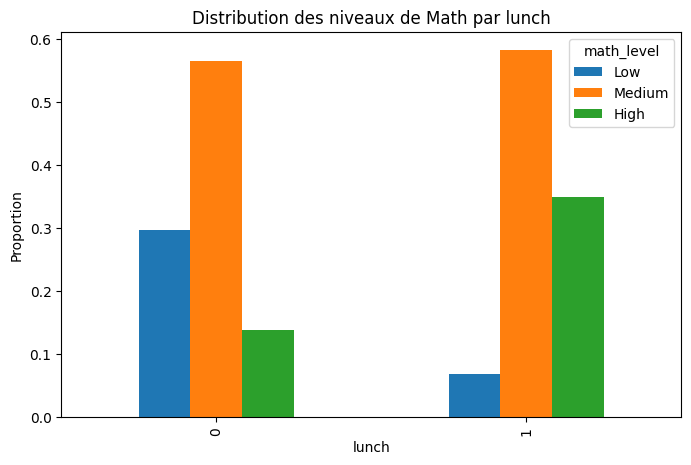

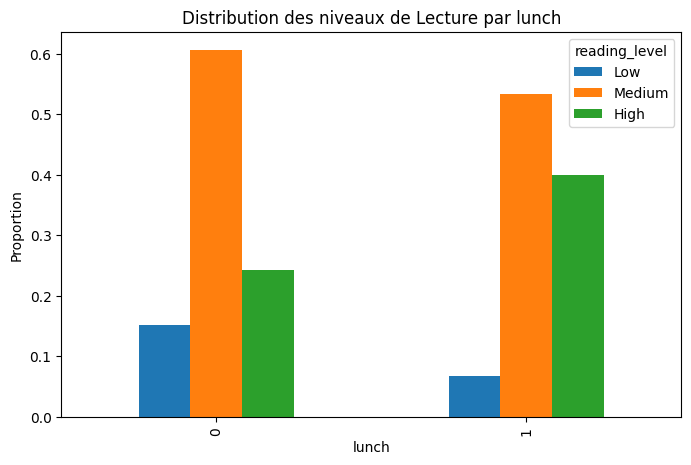

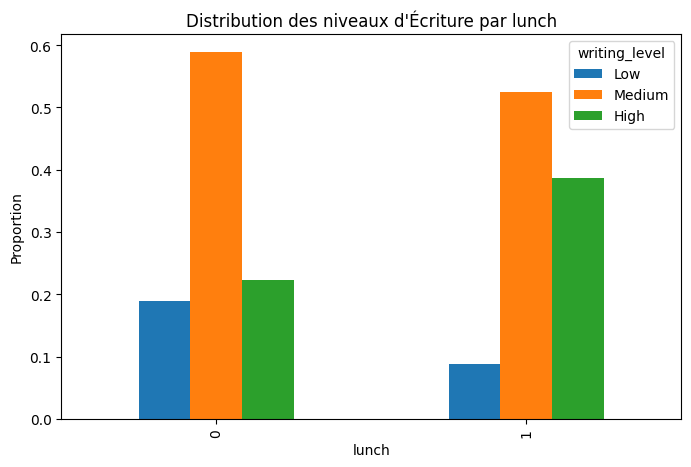

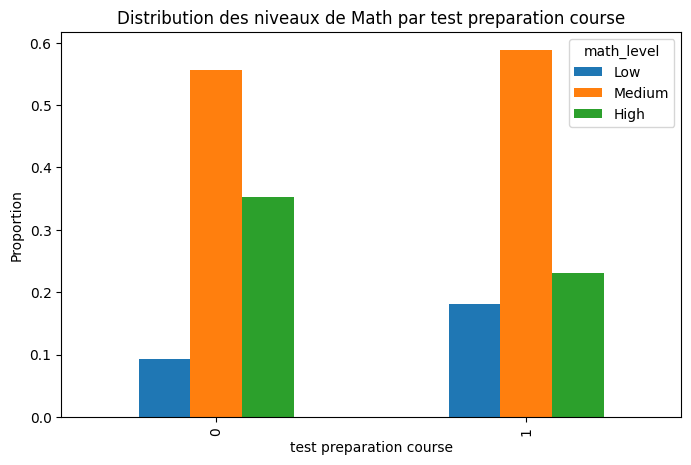

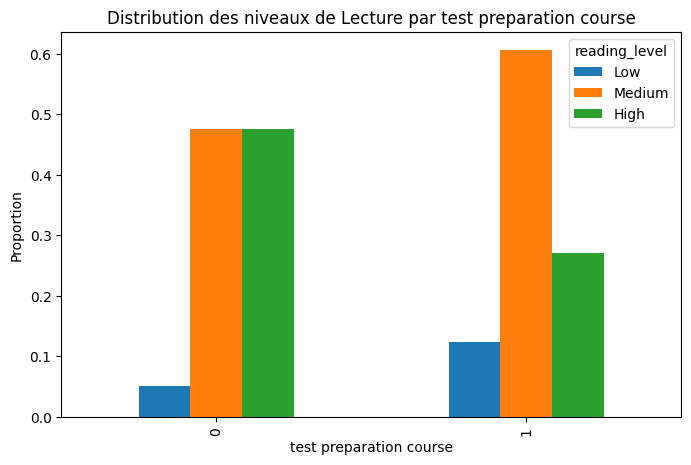

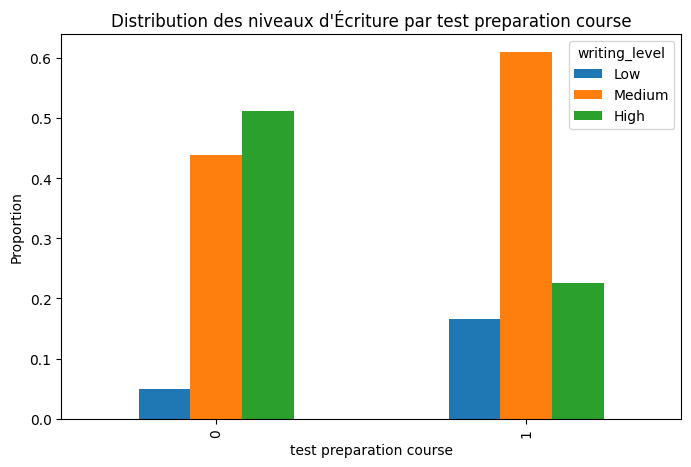

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing

# -----------------------------
# Étape 1 : Charger le dataset
# -----------------------------
df = pd.read_csv('//StudentsPerformance.csv')
# -----------------------------
# Étape 2 : Encodage des variables catégorielles
# -----------------------------
le = preprocessing.LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['race/ethnicity'] = le.fit_transform(df['race/ethnicity'])
df['parental level of education'] = le.fit_transform(df['parental level of education'])
df['lunch'] = le.fit_transform(df['lunch'])
df['test preparation course'] = le.fit_transform(df['test preparation course'])

# -----------------------------
# Étape 3 : Discrétiser les scores en catégories
# -----------------------------
df['math_level'] = pd.cut(df['math score'], bins=[0, 50, 75, 100], labels=['Low','Medium','High'])
df['reading_level'] = pd.cut(df['reading score'], bins=[0, 50, 75, 100], labels=['Low','Medium','High'])
df['writing_level'] = pd.cut(df['writing score'], bins=[0, 50, 75, 100], labels=['Low','Medium','High'])

# -----------------------------
# Étape 4 : Fonction pour plot
# -----------------------------
def plot(col, target_level='math_level', df=df):
    df_plot = df.groupby(col)[target_level].value_counts(normalize=True).unstack()
    ax = df_plot.plot(kind='bar', figsize=(8,5))
    ax.set_ylabel('Proportion')
    return ax

# -----------------------------
# Étape 5 : Afficher les graphiques pour chaque variable catégorielle
# -----------------------------
categorical_cols = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']

for col in categorical_cols:
    # Graphique pour Math
    plot(col, target_level='math_level', df=df)
    plt.title(f'Distribution des niveaux de Math par {col}')
    plt.show()

    # Graphique pour Reading
    plot(col, target_level='reading_level', df=df)
    plt.title(f'Distribution des niveaux de Lecture par {col}')
    plt.show()

    # Graphique pour Writing
    plot(col, target_level='writing_level', df=df)
    plt.title(f'Distribution des niveaux d\'Écriture par {col}')
    plt.show()


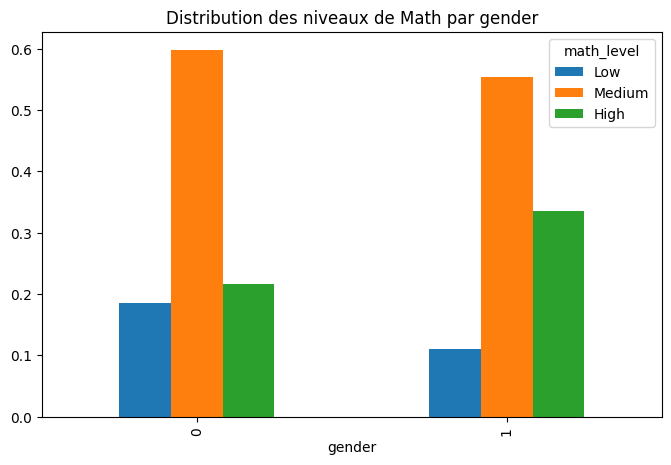

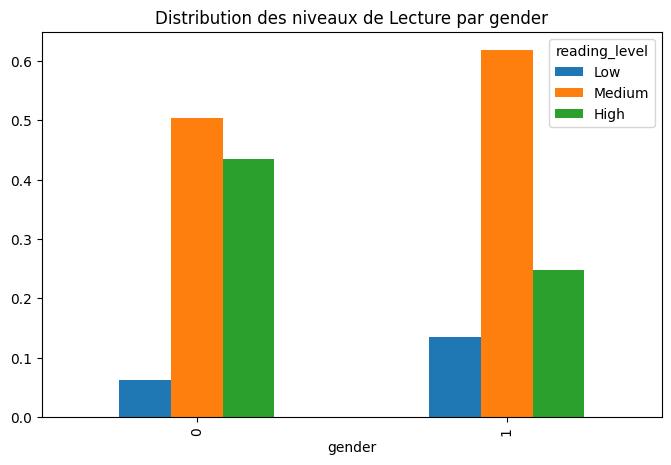

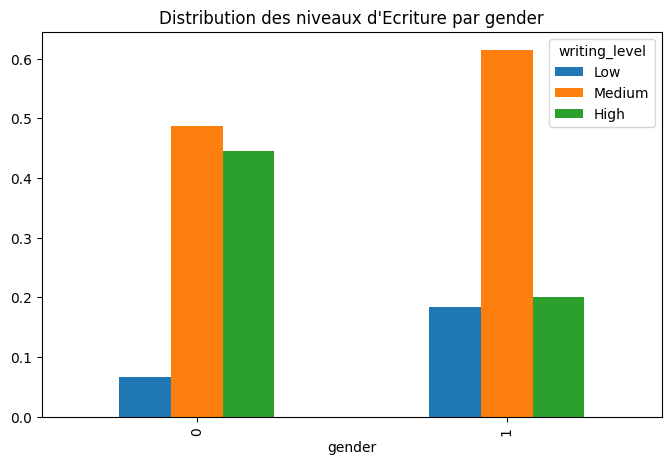

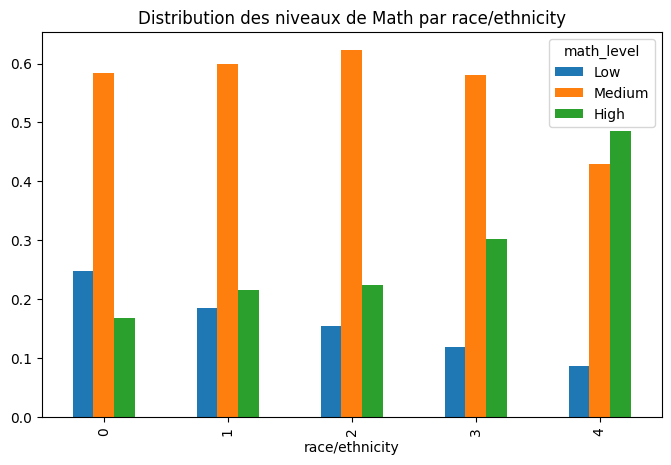

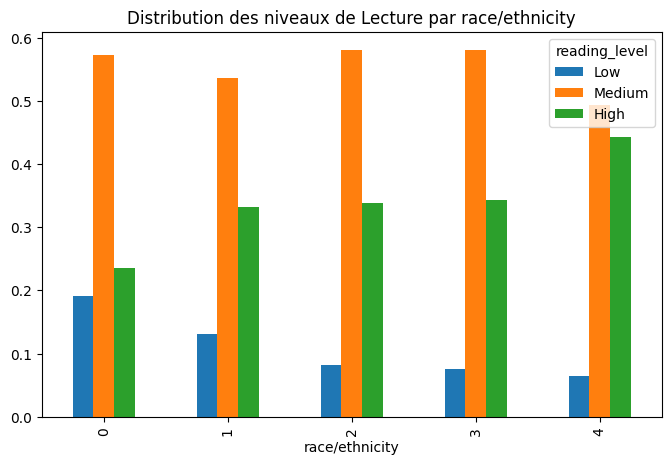

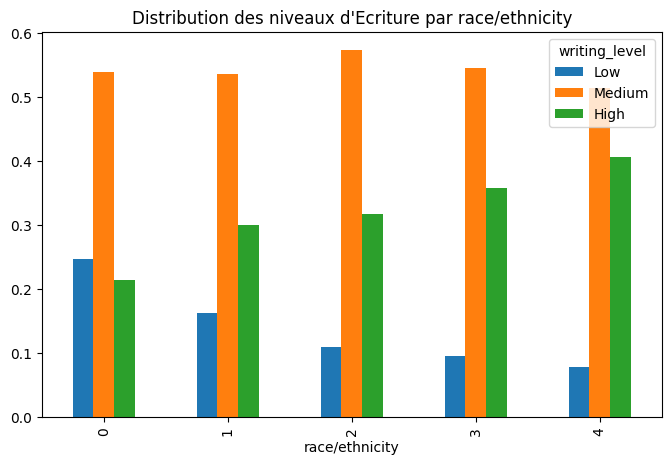

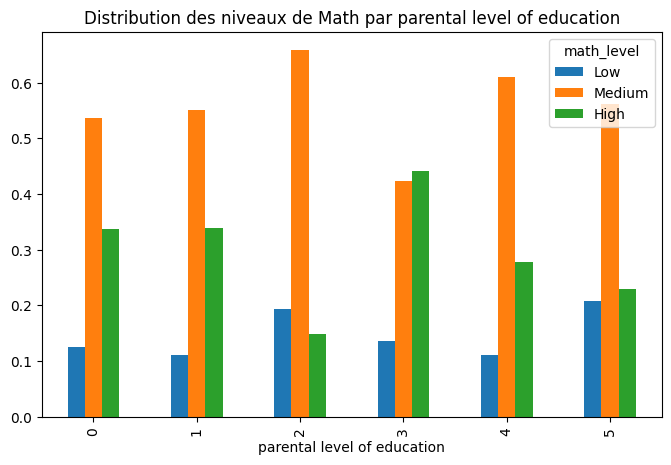

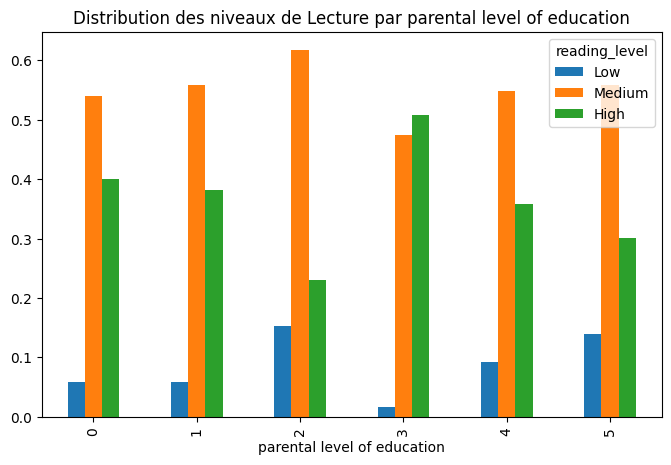

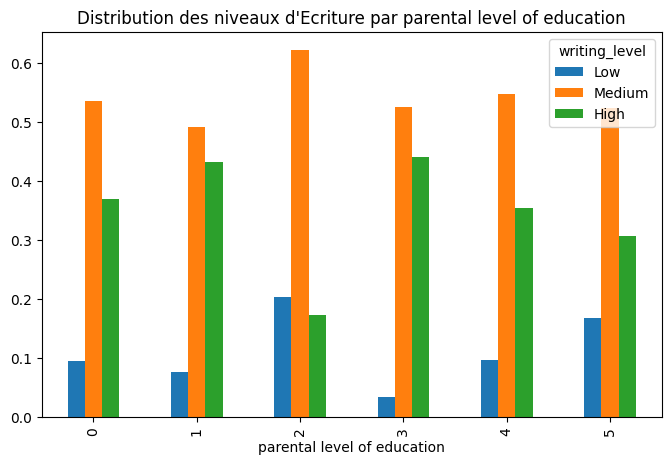

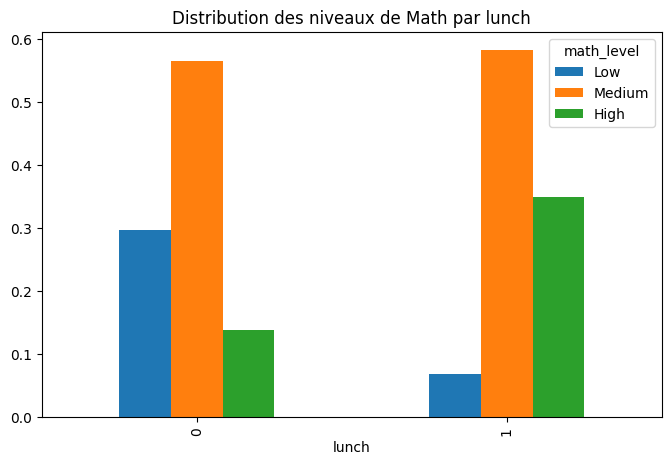

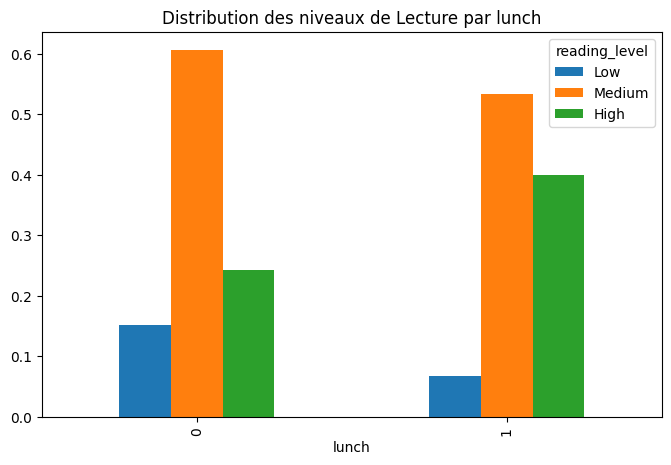

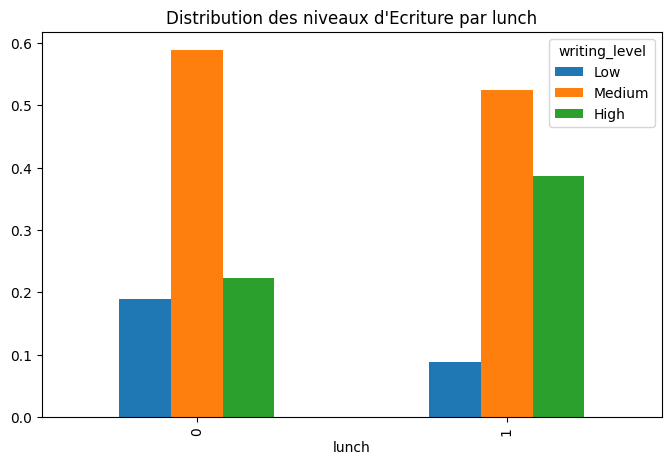

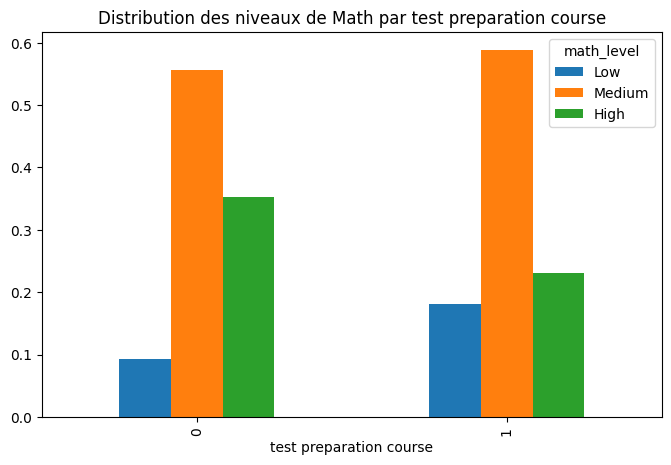

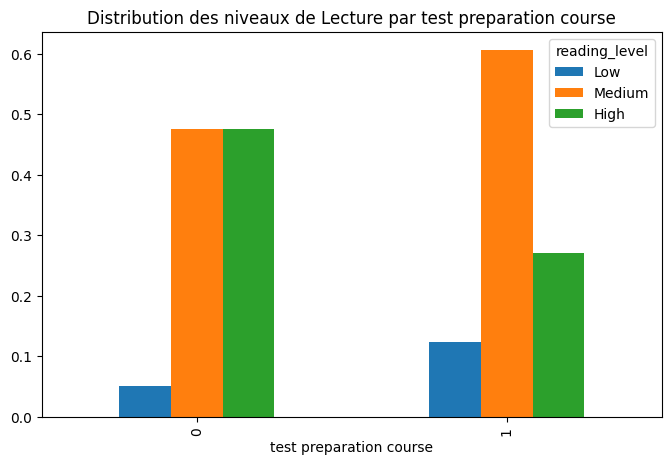

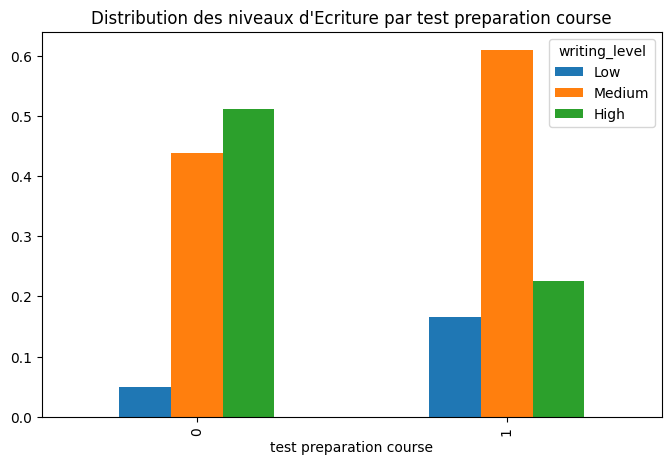

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing

# Load dataset (making this cell self-contained)
df = pd.read_csv('/StudentsPerformance.csv')

# Initialisation du label encoder
le = preprocessing.LabelEncoder()

# Encodage des variables catégorielles (copying from NgZa0rlMy_Tj)
df['gender'] = le.fit_transform(df['gender'])
df['race/ethnicity'] = le.fit_transform(df['race/ethnicity'])
df['parental level of education'] = le.fit_transform(df['parental level of education'])
df['lunch'] = le.fit_transform(df['lunch'])
df['test preparation course'] = le.fit_transform(df['test preparation course'])

# Discretize 'math score' into categories (copying from BzmiICoW0JIJ)
df['math_level'] = pd.cut(df['math score'], bins=[0, 50, 75, 100], labels=['Low','Medium','High'])

# Define the plot function (copying from BzmiICoW0JIJ)
def plot(col, target_level='math_level', df=df):
    return df.groupby(col)[target_level].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(8,5))

# Discretize 'reading score' into categories (original content)
df['reading_level'] = pd.cut(df['reading score'], bins=[0, 50, 75, 100], labels=['Low','Medium','High'])

# Discretize 'writing score' into categories (original content)
df['writing_level'] = pd.cut(df['writing score'], bins=[0, 50, 75, 100], labels=['Low','Medium','High'])

categorical_cols = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']

for col in categorical_cols:
    plot(col, target_level='math_level', df=df)
    plt.title(f'Distribution des niveaux de Math par {col}')
    plt.show()
    plot(col, target_level='reading_level', df=df)
    plt.title(f'Distribution des niveaux de Lecture par {col}')
    plt.show()
    plot(col, target_level='writing_level', df=df)
    plt.title(f'Distribution des niveaux d\'Ecriture par {col}')
    plt.show()

In [26]:
# Créer une target globale (moyenne des scores)
df['average_score'] = (df['math score'] + df['reading score'] + df['writing score']) / 3

# Discrétiser la target en catégories Low, Medium, High
df['performance_level'] = pd.cut(df['average_score'], bins=[0, 50, 75, 100], labels=['Low', 'Medium', 'High'])


In [27]:
def plot(col, df=df):
    """
    Affiche la distribution de la target performance_level pour chaque catégorie de col
    """
    df.groupby(col)['performance_level'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(8,5))
    plt.title(f'Distribution de la performance par {col}')
    plt.ylabel('Proportion')
    plt.show()


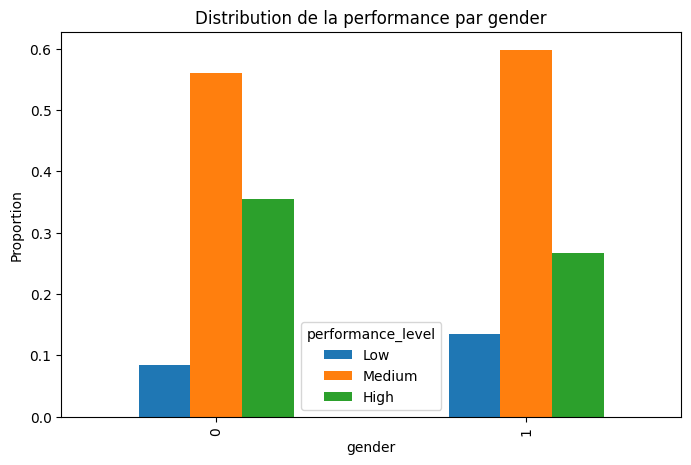

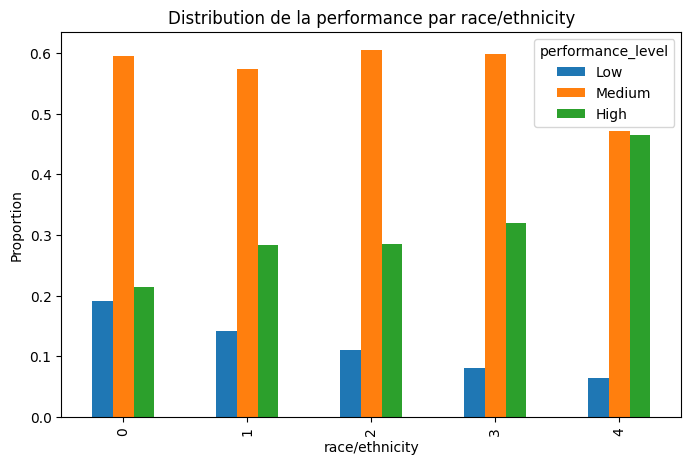

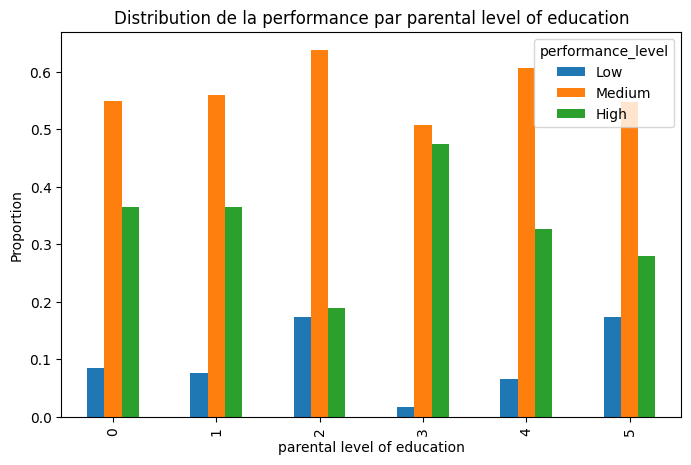

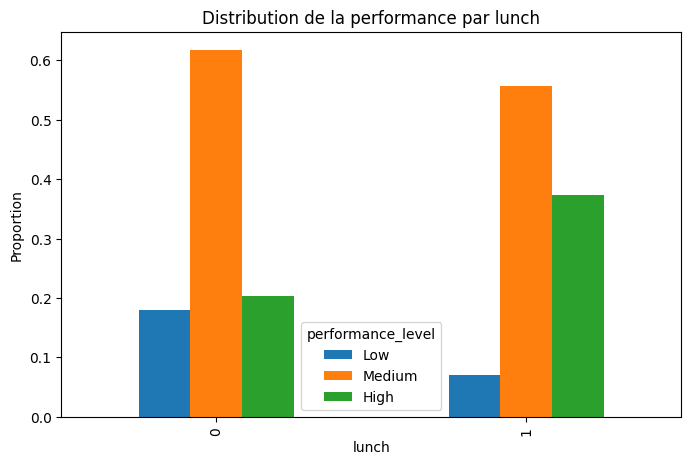

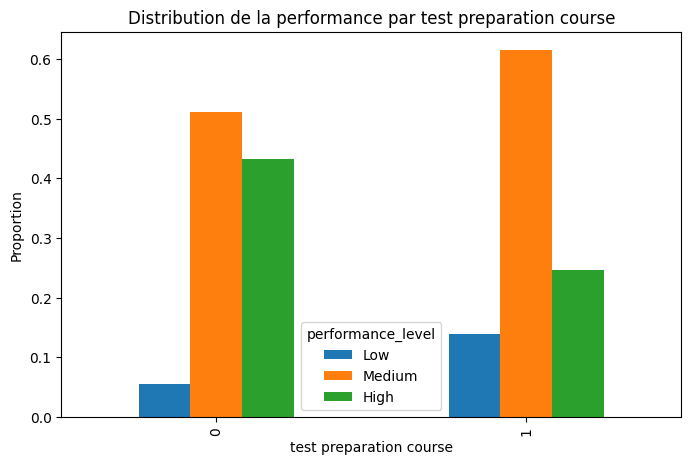

In [28]:
columns_to_plot = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']

for col in columns_to_plot:
    plot(col)


In [29]:
columns_to_keep = ['gender', 'race/ethnicity', 'parental level of education', 'lunch',
                   'test preparation course', 'math score', 'reading score', 'writing score']

df_new = df[columns_to_keep]
df_new.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,1,1,1,1,72,72,74
1,0,2,4,1,0,69,90,88
2,0,1,3,1,1,90,95,93
3,1,0,0,0,1,47,57,44
4,1,2,4,1,1,76,78,75


In [30]:
cn=df_new.corr()
cn

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
gender,1.000000,-0.001502,0.001913,0.021372,-0.006028,0.167982,-0.244313,-0.301225
race/ethnicity,-0.001502,1.000000,-0.031946,0.046563,-0.017508,0.216415,0.145253,0.165691
parental level of education,0.001913,-0.031946,1.000000,0.006320,-0.023968,-0.068279,-0.072444,-0.084299
lunch,0.021372,0.046563,0.006320,1.000000,0.017044,0.350877,0.229560,0.245769
test preparation course,-0.006028,-0.017508,-0.023968,0.017044,1.000000,-0.177702,-0.241780,-0.312946
math score,0.167982,0.216415,-0.068279,0.350877,-0.177702,1.000000,0.817580,0.802642
reading score,-0.244313,0.145253,-0.072444,0.229560,-0.241780,0.817580,1.000000,0.954598
writing score,-0.301225,0.165691,-0.084299,0.245769,-0.312946,0.802642,0.954598,1.000000


**CORRELATION**

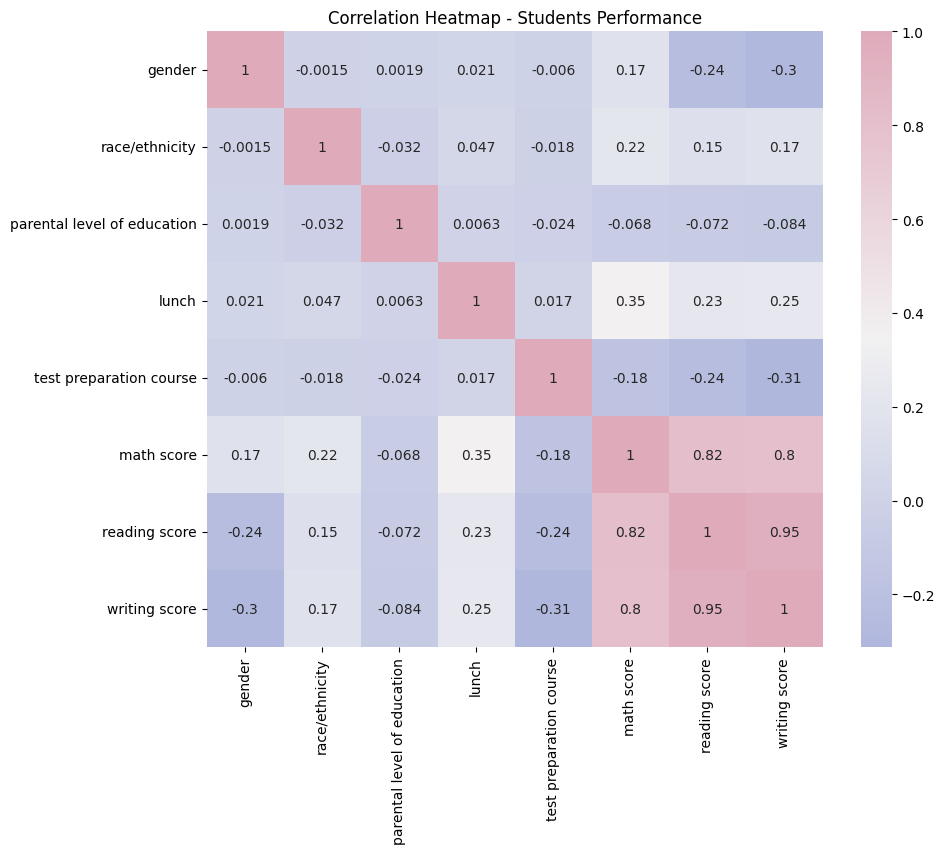

In [31]:
cmap = sns.diverging_palette(260, -10, s=50, l=75, n=6, as_cmap=True)

# Affichage du heatmap
plt.subplots(figsize=(10,8))
sns.heatmap(cn, cmap=cmap, annot=True, square=True)
plt.title("Correlation Heatmap - Students Performance")
plt.show()

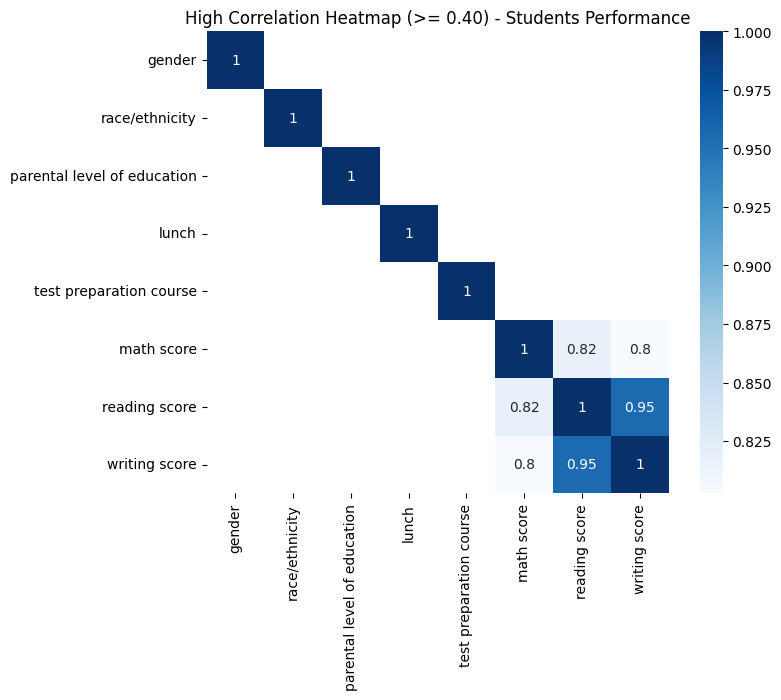

In [32]:
kot = cn[cn >= 0.40]

# Affichage du heatmap
plt.figure(figsize=(8,6))
sns.heatmap(kot, cmap="Blues", annot=True, square=True)
plt.title("High Correlation Heatmap (>= 0.40) - Students Performance")
plt.show()

**Feature Engineering**

Feature Engineering is the process of creating new features using existing features.

The correlation matrix shows that the reading score and writing score are highly correlated (more than 0.80). So, we can create a new feature combining them, for example an average score, to simplify the analysis and improve predictive modeling.

In [29]:
# Travailler sur une copie
df_new = df.copy()

# Mapping des niveaux en nombres
level_mapping = {'Low': 1, 'Medium': 2, 'High': 3}

# Convert to float before fillna to handle Categorical type gracefully
df_new['math_level_num'] = df_new['math_level'].map(level_mapping).astype(float).fillna(0).astype(int)
df_new['reading_level_num'] = df_new['reading_level'].map(level_mapping).astype(float).fillna(0).astype(int)

# Feature engineering : multiplication
df_new['MATH_READING_INTERACTION'] = df_new['math_level_num'] * df_new['reading_level_num']

# Vérification
df_new[['math_level', 'reading_level', 'math_level_num', 'reading_level_num', 'MATH_READING_INTERACTION']].head()

,math_level,reading_level,math_level_num,reading_level_num,MATH_READING_INTERACTION
0,Medium,Medium,2,2,4
1,Medium,High,2,3,6
2,High,High,3,3,9
3,Low,Medium,1,2,2
4,High,High,3,3,9


In [43]:
# Define X and y for the math_level prediction
# Drop all string categorical columns to ensure X is entirely numeric
columns_to_drop_from_X = ['math_level', 'reading_level', 'writing_level', 'performance_level']

# Filter out columns that do not exist in df_new to prevent KeyError
existing_columns_to_drop = [col for col in columns_to_drop_from_X if col in df_new.columns]

X = df_new.drop(columns=existing_columns_to_drop, axis=1)
y = df_new['math_level'] # y is the target math_level (categorical string)

**Target Distribution Imbalance Handling**

In [52]:
from imblearn.over_sampling import ADASYN
import pandas as pd

adasyn = ADASYN(random_state=42)

# y is df_new['math_level'] which is currently integer codes (e.g., 0, 1, 2) from pd.cut.
# We need to map these integer codes to the desired numerical target values (e.g., 1, 2, 3).
# Assuming pd.cut assigned codes such that 0='Low', 1='Medium', 2='High'.

# Define the mapping from current integer codes to desired target values
target_class_mapping = {0: 1, 1: 2, 2: 3}

# Apply this mapping. Using .astype(float).fillna(0).astype(int) is robust
# to handle any potential NaNs if a code in y doesn't exist in the mapping.
y_numeric = y.map(target_class_mapping).astype(float).fillna(0).astype(int)

# Print value counts to verify the new mapping
print("Value counts of numeric target before ADASYN:")
print(y_numeric.value_counts())

# Filter out the class with only 1 sample (class 0) as ADASYN cannot process it.
# Create a boolean mask to keep only rows where y_numeric is not 0.
mask_for_adasyn = y_numeric != 0
X_filtered = X[mask_for_adasyn]
y_numeric_filtered = y_numeric[mask_for_adasyn]

# Now apply ADASYN to the filtered data
X_resampled, y_resampled = adasyn.fit_resample(X_filtered, y_numeric_filtered)

Value counts of numeric target before ADASYN:
math_level
3    576
1    274
2    149
0      1
Name: count, dtype: int64


In [47]:
len(X)

1000

**Logistic Regression**

In [55]:
# 1. Cible
y = df_new['math_level_num']

# 2. Variables explicatives
# List all categorical string columns that should not be in X
columns_to_drop_from_X = [
    'math_level',
    'reading_level',
    'writing_level',
    'performance_level',
    'math_level_num' # This is our target, so it shouldn't be in X
]

# Ensure we only drop columns that actually exist in df_new
existing_columns_to_drop = [col for col in columns_to_drop_from_X if col in df_new.columns]

X = df_new.drop(columns=existing_columns_to_drop, axis=1)

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Identify classes with only one sample
class_counts = y.value_counts()
single_sample_classes = class_counts[class_counts == 1].index

# Filter out samples belonging to single-sample classes
if not single_sample_classes.empty:
    mask = ~y.isin(single_sample_classes)
    X_filtered = X[mask]
    y_filtered = y[mask]
else:
    X_filtered = X
    y_filtered = y

sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_filtered, y_filtered)

# --- 1. Train-Test Split ---
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled,
    y_resampled,
    test_size=0.25,
    random_state=42
)

# --- 2. Logistic Regression ---
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# --- 3. Prédictions ---
y_pred = log_reg.predict(X_test)

# --- 4. Résultats ---
print("Accuracy :", accuracy_score(y_test, y_pred))
print("\nClassification Report :\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix :\n", confusion_matrix(y_test, y_pred))

Accuracy : 0.9976851851851852

Classification Report :
               precision    recall  f1-score   support

           1       0.99      1.00      1.00       148
           2       1.00      0.99      1.00       149
           3       1.00      1.00      1.00       135

    accuracy                           1.00       432
   macro avg       1.00      1.00      1.00       432
weighted avg       1.00      1.00      1.00       432


Confusion Matrix :
 [[148   0   0]
 [  1 148   0]
 [  0   0 135]]


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [56]:
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression(random_state=0)
lr_model.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [57]:
y_lr_pred= lr_model.predict(X_test)
y_lr_pred

array([2, 1, 1, 3, 1, 2, 2, 3, 2, 2, 3, 1, 2, 2, 2, 3, 2, 3, 1, 3, 3, 2,
       1, 2, 2, 2, 2, 1, 1, 2, 3, 1, 1, 3, 1, 3, 3, 3, 2, 3, 3, 1, 3, 2,
       1, 3, 1, 1, 2, 3, 3, 3, 2, 1, 2, 1, 1, 3, 3, 1, 3, 3, 2, 2, 1, 3,
       2, 2, 2, 1, 1, 2, 2, 2, 1, 3, 1, 3, 2, 3, 1, 1, 2, 1, 1, 1, 1, 2,
       3, 3, 1, 3, 2, 2, 1, 3, 1, 3, 3, 3, 2, 2, 3, 2, 1, 3, 3, 1, 1, 1,
       2, 1, 3, 1, 2, 2, 3, 2, 1, 1, 3, 1, 3, 2, 1, 2, 3, 1, 1, 3, 1, 2,
       1, 2, 2, 2, 3, 1, 2, 3, 2, 1, 1, 1, 2, 3, 2, 2, 2, 2, 1, 3, 1, 3,
       2, 1, 2, 3, 3, 1, 2, 2, 1, 1, 3, 3, 2, 2, 3, 1, 1, 2, 2, 3, 2, 2,
       3, 3, 2, 1, 1, 1, 2, 1, 3, 1, 2, 3, 2, 1, 2, 1, 1, 3, 3, 1, 1, 1,
       3, 1, 2, 3, 2, 3, 2, 2, 1, 3, 3, 1, 3, 1, 3, 2, 2, 1, 3, 2, 1, 1,
       3, 1, 3, 2, 3, 3, 1, 2, 1, 3, 3, 3, 1, 3, 2, 3, 3, 2, 3, 2, 1, 1,
       2, 2, 3, 2, 1, 1, 1, 1, 3, 1, 2, 1, 3, 2, 1, 3, 2, 1, 2, 1, 2, 3,
       3, 3, 1, 3, 2, 2, 3, 1, 3, 3, 3, 2, 3, 3, 3, 2, 3, 1, 2, 3, 3, 1,
       2, 1, 3, 2, 1, 3, 1, 1, 2, 1, 2, 1, 2, 3, 2,

In [58]:
from sklearn.metrics import classification_report, accuracy_score, f1_score
lr_cr=classification_report(y_test, y_lr_pred)
print(lr_cr)

              precision    recall  f1-score   support

           1       0.99      1.00      1.00       148
           2       0.99      0.98      0.99       149
           3       0.99      0.99      0.99       135

    accuracy                           0.99       432
   macro avg       0.99      0.99      0.99       432
weighted avg       0.99      0.99      0.99       432



**Decision Tree**

In [59]:
from sklearn.tree import DecisionTreeClassifier
dt_model= DecisionTreeClassifier(criterion='entropy', random_state=0)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [60]:
y_dt_pred= dt_model.predict(X_test)
y_dt_pred

array([2, 1, 1, 3, 1, 2, 2, 3, 2, 2, 3, 1, 2, 2, 2, 3, 2, 3, 1, 3, 3, 2,
       1, 2, 2, 2, 2, 1, 1, 2, 3, 1, 1, 3, 1, 3, 3, 3, 2, 3, 3, 1, 3, 2,
       1, 3, 1, 1, 2, 3, 3, 3, 2, 1, 2, 1, 1, 3, 3, 1, 3, 3, 2, 2, 1, 3,
       2, 2, 2, 1, 1, 2, 2, 2, 1, 3, 1, 2, 2, 3, 1, 1, 2, 1, 1, 1, 1, 2,
       3, 3, 1, 3, 2, 2, 1, 3, 1, 3, 3, 3, 2, 2, 3, 2, 1, 3, 3, 1, 1, 1,
       2, 1, 3, 1, 2, 2, 3, 2, 1, 1, 3, 1, 3, 2, 1, 2, 3, 1, 1, 3, 1, 2,
       1, 2, 2, 2, 3, 1, 2, 3, 2, 1, 1, 1, 2, 3, 2, 2, 2, 2, 1, 3, 1, 3,
       2, 1, 2, 3, 3, 1, 2, 2, 1, 1, 3, 3, 2, 2, 3, 1, 1, 2, 2, 2, 2, 2,
       3, 3, 2, 1, 1, 1, 2, 1, 3, 1, 2, 3, 2, 1, 2, 1, 1, 3, 3, 1, 1, 1,
       3, 1, 2, 3, 2, 3, 2, 2, 1, 3, 3, 1, 3, 1, 3, 2, 2, 1, 3, 2, 1, 1,
       3, 1, 3, 2, 3, 3, 1, 2, 1, 3, 3, 3, 1, 3, 2, 3, 3, 2, 3, 2, 1, 1,
       2, 2, 3, 2, 1, 1, 1, 1, 3, 1, 2, 1, 3, 2, 1, 3, 2, 1, 2, 1, 2, 3,
       3, 3, 1, 3, 2, 2, 3, 1, 3, 3, 3, 2, 3, 3, 3, 2, 3, 1, 2, 3, 3, 1,
       2, 1, 3, 2, 1, 3, 1, 1, 2, 1, 2, 1, 2, 3, 2,

In [61]:
dt_cr=classification_report(y_test, y_dt_pred)
print(dt_cr)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       148
           2       1.00      1.00      1.00       149
           3       1.00      1.00      1.00       135

    accuracy                           1.00       432
   macro avg       1.00      1.00      1.00       432
weighted avg       1.00      1.00      1.00       432



this model is 99.77% accurate

**K Nearest Neighbor**

In [62]:
from sklearn.neighbors import KNeighborsClassifier
knn_model= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [63]:
y_knn_pred= knn_model.predict(X_test)
y_knn_pred

array([2, 1, 1, 3, 1, 2, 2, 3, 2, 2, 3, 1, 2, 2, 2, 3, 2, 3, 1, 3, 3, 2,
       1, 2, 2, 2, 2, 1, 1, 2, 3, 1, 1, 3, 1, 3, 3, 3, 2, 3, 3, 1, 3, 2,
       1, 3, 1, 1, 2, 3, 3, 3, 2, 1, 2, 1, 1, 3, 3, 1, 3, 3, 2, 2, 1, 3,
       2, 2, 2, 1, 1, 2, 2, 2, 1, 3, 1, 2, 2, 3, 1, 1, 2, 1, 1, 1, 1, 2,
       3, 3, 1, 3, 2, 2, 1, 3, 1, 3, 3, 3, 2, 2, 3, 2, 1, 3, 3, 1, 1, 1,
       2, 1, 3, 1, 2, 2, 3, 2, 1, 1, 3, 1, 3, 2, 1, 2, 3, 1, 1, 3, 1, 2,
       1, 2, 2, 2, 3, 1, 2, 3, 2, 1, 1, 1, 2, 3, 2, 2, 2, 2, 1, 3, 1, 3,
       2, 1, 2, 3, 3, 1, 2, 2, 1, 1, 3, 3, 2, 2, 3, 1, 1, 2, 2, 2, 2, 2,
       3, 3, 2, 1, 1, 1, 2, 1, 3, 1, 2, 3, 3, 1, 2, 1, 1, 3, 3, 1, 1, 1,
       3, 1, 2, 3, 2, 3, 2, 2, 1, 3, 3, 1, 3, 1, 3, 2, 2, 1, 3, 2, 1, 1,
       3, 1, 3, 2, 3, 3, 1, 2, 1, 3, 3, 3, 1, 3, 2, 3, 3, 2, 3, 2, 1, 1,
       2, 2, 3, 2, 1, 1, 1, 1, 3, 1, 2, 1, 3, 2, 1, 3, 2, 1, 2, 1, 2, 3,
       3, 3, 1, 3, 2, 2, 3, 1, 3, 3, 3, 2, 3, 3, 3, 2, 3, 1, 2, 3, 3, 1,
       2, 1, 3, 2, 1, 3, 1, 1, 2, 1, 2, 1, 2, 3, 2,

In [64]:
knn_cr=classification_report(y_test, y_knn_pred)
print(knn_cr)

              precision    recall  f1-score   support

           1       0.98      1.00      0.99       148
           2       1.00      0.97      0.99       149
           3       0.99      1.00      1.00       135

    accuracy                           0.99       432
   macro avg       0.99      0.99      0.99       432
weighted avg       0.99      0.99      0.99       432



The K-Nearest Neighbors (KNN) model achieved an accuracy of 99%.

**Gaussian Naive Bayes**

In [65]:
from sklearn.naive_bayes import GaussianNB
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)

GaussianNB()

In [66]:
y_gnb_pred= gnb_model.predict(X_test)
y_gnb_pred

array([2, 1, 1, 3, 1, 2, 2, 3, 2, 2, 2, 1, 2, 2, 2, 3, 2, 3, 1, 3, 2, 2,
       1, 2, 2, 2, 2, 1, 1, 2, 3, 1, 1, 3, 1, 3, 3, 2, 2, 3, 3, 1, 3, 2,
       1, 3, 1, 1, 2, 3, 3, 3, 2, 1, 2, 1, 1, 3, 3, 1, 3, 3, 3, 2, 1, 3,
       2, 2, 3, 1, 1, 2, 2, 1, 1, 3, 1, 2, 2, 3, 1, 1, 2, 1, 1, 1, 1, 2,
       3, 3, 1, 3, 2, 2, 1, 3, 1, 3, 3, 3, 2, 2, 3, 2, 1, 3, 3, 1, 1, 1,
       2, 1, 3, 1, 2, 2, 3, 2, 1, 1, 3, 1, 3, 2, 1, 2, 3, 1, 1, 3, 1, 2,
       1, 2, 2, 3, 2, 1, 2, 3, 2, 1, 1, 1, 2, 3, 2, 2, 2, 2, 1, 3, 1, 2,
       2, 1, 2, 3, 3, 1, 2, 2, 1, 1, 2, 3, 2, 3, 3, 1, 1, 1, 2, 2, 2, 2,
       3, 3, 2, 1, 1, 1, 1, 1, 3, 1, 2, 3, 2, 1, 2, 1, 1, 3, 2, 1, 1, 1,
       3, 1, 2, 3, 2, 3, 2, 2, 1, 3, 3, 1, 3, 1, 3, 2, 3, 1, 3, 2, 1, 1,
       3, 1, 3, 2, 3, 3, 1, 2, 1, 3, 3, 2, 1, 3, 2, 3, 3, 2, 2, 1, 1, 1,
       2, 2, 3, 3, 1, 1, 1, 1, 3, 1, 2, 1, 3, 1, 1, 2, 2, 1, 2, 1, 2, 3,
       3, 2, 1, 3, 2, 2, 3, 1, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 2, 3, 3, 1,
       3, 1, 3, 2, 1, 3, 1, 1, 2, 1, 2, 1, 2, 3, 2,

In [67]:
gnb_cr=classification_report(y_test, y_gnb_pred)
print(gnb_cr)

              precision    recall  f1-score   support

           1       0.95      1.00      0.97       148
           2       0.88      0.87      0.87       149
           3       0.91      0.87      0.89       135

    accuracy                           0.91       432
   macro avg       0.91      0.91      0.91       432
weighted avg       0.91      0.91      0.91       432



**The Gaussian Naive Bayes model achieved an accuracy of 91%**

Multinomial Naive **Bayes**

In [68]:
from sklearn.naive_bayes import MultinomialNB
mnb_model = MultinomialNB()
mnb_model.fit(X_train, y_train)

MultinomialNB()

In [69]:
#Predicting result using testing data
y_mnb_pred= mnb_model.predict(X_test)
y_mnb_pred

array([2, 1, 1, 3, 1, 3, 2, 3, 2, 2, 3, 1, 2, 1, 2, 3, 3, 3, 1, 3, 2, 2,
       1, 1, 2, 2, 3, 1, 1, 2, 2, 2, 1, 3, 2, 3, 3, 3, 2, 3, 3, 1, 3, 2,
       1, 3, 1, 1, 2, 3, 3, 2, 2, 1, 2, 1, 2, 3, 3, 1, 2, 2, 3, 2, 1, 3,
       2, 2, 2, 1, 1, 3, 2, 2, 1, 3, 1, 3, 1, 3, 2, 1, 2, 1, 1, 1, 1, 2,
       3, 2, 1, 3, 2, 2, 1, 3, 1, 3, 3, 3, 2, 2, 3, 1, 2, 3, 3, 1, 1, 1,
       2, 2, 3, 1, 3, 2, 3, 3, 1, 1, 3, 1, 3, 2, 1, 3, 3, 1, 1, 3, 1, 2,
       1, 2, 2, 3, 2, 1, 2, 3, 2, 1, 2, 1, 2, 3, 3, 2, 2, 1, 1, 3, 1, 2,
       2, 2, 2, 3, 2, 1, 2, 3, 1, 1, 3, 2, 2, 2, 3, 1, 1, 2, 2, 3, 3, 2,
       3, 2, 2, 2, 1, 1, 2, 1, 3, 1, 2, 3, 2, 1, 3, 1, 1, 3, 3, 1, 1, 1,
       3, 1, 3, 3, 2, 3, 2, 2, 1, 3, 3, 1, 3, 1, 3, 2, 2, 1, 3, 2, 1, 1,
       3, 1, 3, 2, 3, 3, 2, 2, 1, 2, 3, 3, 1, 3, 2, 3, 3, 2, 2, 2, 1, 2,
       2, 2, 3, 3, 1, 1, 1, 1, 3, 2, 3, 2, 3, 1, 1, 3, 2, 1, 2, 1, 2, 3,
       3, 3, 1, 3, 3, 2, 3, 1, 3, 3, 3, 2, 3, 3, 3, 2, 3, 1, 3, 3, 3, 1,
       3, 1, 3, 2, 1, 2, 1, 1, 2, 1, 3, 2, 3, 3, 3,

In [70]:
#Model accuracy
mnb_cr=classification_report(y_test, y_mnb_pred)
print(mnb_cr)

              precision    recall  f1-score   support

           1       0.95      0.85      0.90       148
           2       0.73      0.75      0.74       149
           3       0.79      0.85      0.82       135

    accuracy                           0.82       432
   macro avg       0.82      0.82      0.82       432
weighted avg       0.82      0.82      0.82       432



The Multinomial Naive Bayes model achieved an accuracy of 82%.

Support Vector Classifier

In [71]:
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

In [72]:
y_svc_pred= svc_model.predict(X_test)
y_svc_pred

array([2, 1, 1, 3, 1, 2, 2, 3, 2, 2, 3, 1, 2, 2, 2, 3, 2, 3, 1, 3, 3, 2,
       1, 2, 2, 2, 2, 1, 1, 2, 3, 1, 1, 3, 1, 3, 3, 3, 2, 3, 3, 1, 3, 2,
       1, 3, 1, 1, 2, 3, 3, 3, 2, 1, 2, 1, 1, 3, 3, 1, 3, 3, 3, 2, 1, 3,
       2, 2, 3, 1, 1, 2, 1, 1, 1, 3, 1, 2, 2, 3, 1, 1, 2, 1, 1, 1, 1, 2,
       3, 3, 1, 3, 2, 2, 1, 3, 1, 3, 3, 3, 2, 2, 3, 2, 1, 3, 3, 1, 1, 1,
       2, 1, 3, 1, 2, 2, 3, 2, 1, 1, 3, 1, 3, 2, 1, 2, 3, 1, 1, 3, 1, 2,
       1, 2, 2, 3, 3, 1, 2, 3, 2, 1, 1, 1, 2, 3, 2, 2, 2, 2, 1, 3, 1, 3,
       2, 1, 2, 3, 3, 1, 2, 1, 1, 1, 3, 3, 2, 2, 3, 1, 1, 2, 2, 2, 2, 2,
       3, 3, 2, 1, 1, 1, 2, 1, 3, 1, 1, 3, 2, 1, 2, 1, 1, 3, 3, 1, 1, 1,
       3, 1, 2, 3, 1, 3, 2, 2, 1, 3, 3, 1, 3, 1, 3, 2, 2, 1, 3, 2, 1, 1,
       3, 1, 3, 2, 3, 3, 1, 2, 1, 3, 3, 3, 1, 3, 2, 3, 3, 2, 3, 2, 1, 1,
       2, 2, 3, 2, 1, 1, 1, 1, 3, 1, 2, 1, 3, 1, 1, 3, 2, 1, 2, 1, 2, 3,
       3, 3, 1, 3, 2, 2, 3, 1, 3, 3, 3, 2, 3, 3, 3, 2, 3, 1, 2, 3, 3, 1,
       2, 1, 3, 2, 1, 3, 1, 1, 2, 1, 2, 1, 2, 3, 2,

In [73]:
svc_cr=classification_report(y_test, y_svc_pred)
print(svc_cr)

              precision    recall  f1-score   support

           1       0.93      1.00      0.96       148
           2       1.00      0.89      0.94       149
           3       0.97      1.00      0.99       135

    accuracy                           0.96       432
   macro avg       0.97      0.96      0.96       432
weighted avg       0.97      0.96      0.96       432



The Support Vector Classifier model achieved an accuracy of 96%.

Random Forest

In [74]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [75]:
y_rf_pred= rf_model.predict(X_test)
y_rf_pred

array([2, 1, 1, 3, 1, 2, 2, 3, 2, 2, 3, 1, 2, 2, 2, 3, 2, 3, 1, 3, 3, 2,
       1, 2, 2, 2, 2, 1, 1, 2, 3, 1, 1, 3, 1, 3, 3, 3, 2, 3, 3, 1, 3, 2,
       1, 3, 1, 1, 2, 3, 3, 3, 2, 1, 2, 1, 1, 3, 3, 1, 3, 3, 2, 2, 1, 3,
       2, 2, 2, 1, 1, 2, 2, 2, 1, 3, 1, 2, 2, 3, 1, 1, 2, 1, 1, 1, 1, 2,
       3, 3, 1, 3, 2, 2, 1, 3, 1, 3, 3, 3, 2, 2, 3, 2, 1, 3, 3, 1, 1, 1,
       2, 1, 3, 1, 2, 2, 3, 2, 1, 1, 3, 1, 3, 2, 1, 2, 3, 1, 1, 3, 1, 2,
       1, 2, 2, 2, 3, 1, 2, 3, 2, 1, 1, 1, 2, 3, 2, 2, 2, 2, 1, 3, 1, 3,
       2, 1, 2, 3, 3, 1, 2, 2, 1, 1, 3, 3, 2, 2, 3, 1, 1, 2, 2, 2, 2, 2,
       3, 3, 2, 1, 1, 1, 2, 1, 3, 1, 2, 3, 2, 1, 2, 1, 1, 3, 3, 1, 1, 1,
       3, 1, 2, 3, 2, 3, 2, 2, 1, 3, 3, 1, 3, 1, 3, 2, 2, 1, 3, 2, 1, 1,
       3, 1, 3, 2, 3, 3, 1, 2, 1, 3, 3, 3, 1, 3, 2, 3, 3, 2, 3, 2, 1, 1,
       2, 2, 3, 2, 1, 1, 1, 1, 3, 1, 2, 1, 3, 2, 1, 3, 2, 1, 2, 1, 2, 3,
       3, 3, 1, 3, 2, 2, 3, 1, 3, 3, 3, 2, 3, 3, 3, 2, 3, 1, 2, 3, 3, 1,
       2, 1, 3, 2, 1, 3, 1, 1, 2, 1, 2, 1, 2, 3, 2,

In [76]:
rf_cr=classification_report(y_test, y_rf_pred)
print(rf_cr)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       148
           2       1.00      1.00      1.00       149
           3       1.00      1.00      1.00       135

    accuracy                           1.00       432
   macro avg       1.00      1.00      1.00       432
weighted avg       1.00      1.00      1.00       432



Gradient Boosting

In [77]:
from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

GradientBoostingClassifier()

In [78]:
y_gb_pred= gb_model.predict(X_test)
y_gb_pred

array([2, 1, 1, 3, 1, 2, 2, 3, 2, 2, 3, 1, 2, 2, 2, 3, 2, 3, 1, 3, 3, 2,
       1, 2, 2, 2, 2, 1, 1, 2, 3, 1, 1, 3, 1, 3, 3, 3, 2, 3, 3, 1, 3, 2,
       1, 3, 1, 1, 2, 3, 3, 3, 2, 1, 2, 1, 1, 3, 3, 1, 3, 3, 2, 2, 1, 3,
       2, 2, 2, 1, 1, 2, 2, 2, 1, 3, 1, 2, 2, 3, 1, 1, 2, 1, 1, 1, 1, 2,
       3, 3, 1, 3, 2, 2, 1, 3, 1, 3, 3, 3, 2, 2, 3, 2, 1, 3, 3, 1, 1, 1,
       2, 1, 3, 1, 2, 2, 3, 2, 1, 1, 3, 1, 3, 2, 1, 2, 3, 1, 1, 3, 1, 2,
       1, 2, 2, 2, 3, 1, 2, 3, 2, 1, 1, 1, 2, 3, 2, 2, 2, 2, 1, 3, 1, 3,
       2, 1, 2, 3, 3, 1, 2, 2, 1, 1, 3, 3, 2, 2, 3, 1, 1, 2, 2, 2, 2, 2,
       3, 3, 2, 1, 1, 1, 2, 1, 3, 1, 2, 3, 2, 1, 2, 1, 1, 3, 3, 1, 1, 1,
       3, 1, 2, 3, 2, 3, 2, 2, 1, 3, 3, 1, 3, 1, 3, 2, 2, 1, 3, 2, 1, 1,
       3, 1, 3, 2, 3, 3, 1, 2, 1, 3, 3, 3, 1, 3, 2, 3, 3, 2, 3, 2, 1, 1,
       2, 2, 3, 2, 1, 1, 1, 1, 3, 1, 2, 1, 3, 2, 1, 3, 2, 1, 2, 1, 2, 3,
       3, 3, 1, 3, 2, 2, 3, 1, 3, 3, 3, 2, 3, 3, 3, 2, 3, 1, 2, 3, 3, 1,
       2, 1, 3, 2, 1, 3, 1, 1, 2, 1, 2, 1, 2, 3, 2,

In [79]:
gb_cr=classification_report(y_test, y_gb_pred)
print(gb_cr)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       148
           2       1.00      1.00      1.00       149
           3       1.00      1.00      1.00       135

    accuracy                           1.00       432
   macro avg       1.00      1.00      1.00       432
weighted avg       1.00      1.00      1.00       432



The Random Forest model achieved an accuracy of 100%